In [20]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [4]:
newdf = pd.read_csv("Train.csv")
newdf_test = pd.read_csv("Test.csv")

In [5]:
labeldf=newdf['label']
labeldf_test=newdf_test['label']


# change the label column
newlabeldf=labeldf.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                           'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})
newlabeldf_test=labeldf_test.replace({ 'normal' : 0, 'neptune' : 1 ,'back': 1, 'land': 1, 'pod': 1, 'smurf': 1, 'teardrop': 1,'mailbomb': 1, 'apache2': 1, 'processtable': 1, 'udpstorm': 1, 'worm': 1,
                           'ipsweep' : 2,'nmap' : 2,'portsweep' : 2,'satan' : 2,'mscan' : 2,'saint' : 2
                           ,'ftp_write': 3,'guess_passwd': 3,'imap': 3,'multihop': 3,'phf': 3,'spy': 3,'warezclient': 3,'warezmaster': 3,'sendmail': 3,'named': 3,'snmpgetattack': 3,'snmpguess': 3,'xlock': 3,'xsnoop': 3,'httptunnel': 3,
                            'buffer_overflow': 4,'loadmodule': 4,'perl': 4,'rootkit': 4,'ps': 4,'sqlattack': 4,'xterm': 4})



#put the new label column back
newdf['label'] = newlabeldf
newdf_test['label'] = newlabeldf_test

In [6]:
#Split the test and train data into training and testing
# train set:
x=newdf.drop(columns=["label"])  # features
y=newlabeldf  # label
# test set:
xtest=newdf_test.drop(columns=["label"]) # features
ytest=newlabeldf_test # label

In [7]:
# Step 2: the value of every feature is mapped to the [0,1] range linearly
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
# Training Set
scale = MinMaxScaler()
scale = preprocessing.StandardScaler().fit(x)
x=scale.transform(x)
scaletest = preprocessing.StandardScaler().fit(xtest)
xtest=scaletest.transform(xtest)

In [8]:
to_drop_DoS = [0,1]
to_drop_Probe = [0,2]
to_drop_R2L = [0,3]
to_drop_U2R = [0,4]

# Filter all rows with label value except itself
# isin filter function

DoS_df=newdf[newdf['label'].isin(to_drop_DoS)];
Probe_df=newdf[newdf['label'].isin(to_drop_Probe)];
R2L_df=newdf[newdf['label'].isin(to_drop_R2L)];
U2R_df=newdf[newdf['label'].isin(to_drop_U2R)];



#test
DoS_df_test=newdf_test[newdf_test['label'].isin(to_drop_DoS)];
Probe_df_test=newdf_test[newdf_test['label'].isin(to_drop_Probe)];
R2L_df_test=newdf_test[newdf_test['label'].isin(to_drop_R2L)];
U2R_df_test=newdf_test[newdf_test['label'].isin(to_drop_U2R)];


print('Train Set:')
print('Dimensions of DoS:' ,DoS_df.shape)
print('Dimensions of Probe:' ,Probe_df.shape)
print('Dimensions of R2L:' ,R2L_df.shape)
print('Dimensions of U2R:' ,U2R_df.shape)
print()
print('Test Set:')
print('Dimensions of DoS:' ,DoS_df_test.shape)
print('Dimensions of Probe:' ,Probe_df_test.shape)
print('Dimensions of R2L:' ,R2L_df_test.shape)
print('Dimensions of U2R:' ,U2R_df_test.shape)

Train Set:
Dimensions of DoS: (113270, 123)
Dimensions of Probe: (78999, 123)
Dimensions of R2L: (68338, 123)
Dimensions of U2R: (67395, 123)

Test Set:
Dimensions of DoS: (6496, 123)
Dimensions of Probe: (4554, 123)
Dimensions of R2L: (5037, 123)
Dimensions of U2R: (2219, 123)


In [9]:
# Split dataframes into X & Y
# X Properties, Y result variable

X_DoS = DoS_df.drop(columns=["label"])
Y_DoS = DoS_df.label

X_Probe = Probe_df.drop(columns=["label"])
Y_Probe = Probe_df.label

X_R2L = R2L_df.drop(columns=["label"])
Y_R2L = R2L_df.label

X_U2R = U2R_df.drop(columns=["label"])
Y_U2R = U2R_df.label

# test set
X_DoS_test = DoS_df_test.drop(columns=["label"])
Y_DoS_test = DoS_df_test.label

X_Probe_test = Probe_df_test.drop(columns=["label"])
Y_Probe_test = Probe_df_test.label

X_R2L_test = R2L_df_test.drop(columns=["label"])
Y_R2L_test = R2L_df_test.label

X_U2R_test = U2R_df_test.drop(columns=["label"])
Y_U2R_test = U2R_df_test.label


In [10]:
X_DoS

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,146,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,232,8153,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,199,420,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
125969,8,105,145,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125970,0,2231,384,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
125971,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [11]:
colNames=list(X_DoS)
colNames_test=list(X_DoS_test)

In [12]:
from sklearn import preprocessing

scaler1 = preprocessing.StandardScaler().fit(X_DoS)
X_DoS=scaler1.transform(X_DoS) 

scaler2 = preprocessing.StandardScaler().fit(X_Probe)
X_Probe=scaler2.transform(X_Probe)

scaler3 = preprocessing.StandardScaler().fit(X_R2L)
X_R2L=scaler3.transform(X_R2L)

scaler4 = preprocessing.StandardScaler().fit(X_U2R)
X_U2R=scaler4.transform(X_U2R) 

# test data
scaler5 = preprocessing.StandardScaler().fit(X_DoS_test)
X_DoS_test=scaler5.transform(X_DoS_test) 

scaler6 = preprocessing.StandardScaler().fit(X_Probe_test)
X_Probe_test=scaler6.transform(X_Probe_test) 

scaler7 = preprocessing.StandardScaler().fit(X_R2L_test)
X_R2L_test=scaler7.transform(X_R2L_test) 

scaler8 = preprocessing.StandardScaler().fit(X_U2R_test)
X_U2R_test=scaler8.transform(X_U2R_test)

In [13]:
X_DoS[0]

array([-9.93194524e-02, -2.41694947e-02, -5.23087470e-02, -1.48580045e-02,
       -9.44133763e-02, -6.64411495e-03, -8.55959191e-02, -2.15171149e-02,
       -8.70242969e-01, -1.22491853e-02, -3.47989093e-02, -2.56356488e-02,
       -1.30071692e-02, -2.63597259e-02, -1.81631753e-02, -4.27709864e-02,
        0.00000000e+00, -2.97128607e-03, -8.81312159e-02, -7.63362269e-01,
       -3.63954411e-01, -6.77468066e-01, -6.74869545e-01, -3.12759485e-01,
       -3.15134925e-01,  7.84104085e-01, -3.61209020e-01, -3.50012854e-01,
       -3.85496362e-01, -8.84122928e-01, -8.15525519e-01, -1.94791730e-01,
        3.33144290e-01, -2.83192321e-01, -6.79073200e-01, -6.66814438e-01,
       -1.49019397e-01, -3.18156129e-01, -1.95163021e-01,  4.27208618e-01,
       -3.65150198e-01, -4.05560725e-02, -2.43281135e-02, -8.70051422e-02,
        0.00000000e+00, -9.14287924e-02, -7.87998382e-02, -8.03169369e-02,
       -6.87591292e-02, -6.90824183e-02, -6.67871604e-02, -6.79115115e-02,
       -6.95966164e-02, -

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Input, RepeatVector, TimeDistributed
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming X_DoS, Y_DoS, X_DoS_test, Y_DoS_test are your data
# Assuming you've already loaded your data and preprocessed it

# Function to create LSTM model
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, input_shape=input_shape, return_sequences=True),
        Dropout(0.2),
        LSTM(32),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    return model

# Function to create GRU model
def create_gru_model(input_shape):
    model = Sequential([
        GRU(64, input_shape=input_shape, return_sequences=True),
        Dropout(0.2),
        GRU(32),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    return model

# Function to create Autoencoder model
def create_autoencoder_model(input_shape):
    model = Sequential([
        Input(input_shape),
        Dense(32, activation='relu'),
        Dense(input_shape[0], activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Train/test split
X_train, X_val, Y_train, Y_val = train_test_split(X_DoS, Y_DoS, test_size=0.2, random_state=42)

# Reshape input data for LSTM and GRU models
X_train_lstm = np.expand_dims(X_train, axis=1)  # Reshape for LSTM (add axis for time steps)
X_val_lstm = np.expand_dims(X_val, axis=1)  # Reshape for LSTM (add axis for time steps)

X_train_gru = np.expand_dims(X_train, axis=1)  # Reshape for GRU (add axis for time steps)
X_val_gru = np.expand_dims(X_val, axis=1)  # Reshape for GRU (add axis for time steps)

# Create and train LSTM model
lstm_model = create_lstm_model(X_train_lstm.shape[1:])  # Input shape: (1, 122)
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_history = lstm_model.fit(X_train_lstm, Y_train, epochs=10, validation_data=(X_val_lstm, Y_val))

# Create and train GRU model
gru_model = create_gru_model(X_train_gru.shape[1:])  # Input shape: (1, 122)
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gru_history = gru_model.fit(X_train_gru, Y_train, epochs=10, validation_data=(X_val_gru, Y_val))

# Create and train Autoencoder model
autoencoder_model = create_autoencoder_model(X_train.shape[1:])  # Input shape: (122,)
autoencoder_history = autoencoder_model.fit(X_train, X_train, epochs=10, validation_data=(X_val, X_val))

# Save models
lstm_model.save('lstm_model.h5')
gru_model.save('gru_model.h5')
autoencoder_model.save('autoencoder_model.h5')



Epoch 1/10


2832/2832 [==============================] - 36s 9ms/step - loss: 0.0253 - accuracy: 0.9952 - val_loss: 0.0058 - val_accuracy: 0.9983
Epoch 2/10
2832/2832 [==============================] - 24s 9ms/step - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.0038 - val_accuracy: 0.9987
Epoch 3/10
2832/2832 [==============================] - 24s 8ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 0.0036 - val_accuracy: 0.9986
Epoch 4/10
2832/2832 [==============================] - 24s 8ms/step - loss: 0.0029 - accuracy: 0.9991 - val_loss: 0.0032 - val_accuracy: 0.9988
Epoch 5/10
2832/2832 [==============================] - 24s 8ms/step - loss: 0.0024 - accuracy: 0.9991 - val_loss: 0.0028 - val_accuracy: 0.9992
Epoch 6/10
2832/2832 [==============================] - 24s 8ms/step - loss: 0.0021 - accuracy: 0.9993 - val_loss: 0.0031 - val_accuracy: 0.9989
Epoch 7/10
2832/2832 [==============================] - 24s 8ms/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 0.0024 - va

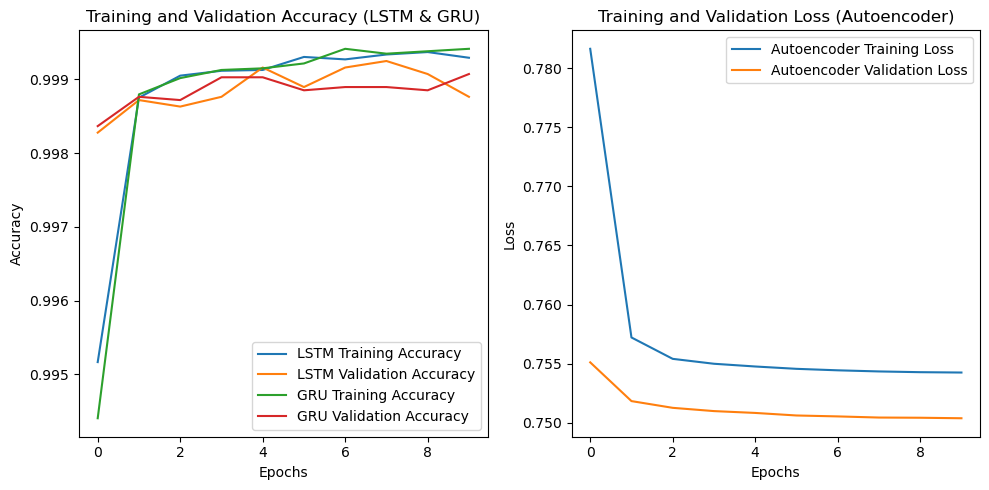

In [15]:
# Plot training history
plt.figure(figsize=(10, 5))

# Plot LSTM and GRU training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.plot(gru_history.history['accuracy'], label='GRU Training Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='GRU Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (LSTM & GRU)')
plt.legend()

# Plot Autoencoder training and validation loss
plt.subplot(1, 2, 2)
plt.plot(autoencoder_history.history['loss'], label='Autoencoder Training Loss')
plt.plot(autoencoder_history.history['val_loss'], label='Autoencoder Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Autoencoder)')
plt.legend()

plt.tight_layout()
plt.show()


In [16]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Input, RepeatVector, TimeDistributed
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Function to create LSTM model
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, input_shape=input_shape, return_sequences=True),
        Dropout(0.2),
        LSTM(32),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    return model

# Function to create GRU model
def create_gru_model(input_shape):
    model = Sequential([
        GRU(64, input_shape=input_shape, return_sequences=True),
        Dropout(0.2),
        GRU(32),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    return model

# Function to create Autoencoder model
def create_autoencoder_model(input_shape):
    model = Sequential([
        Input(input_shape),
        Dense(32, activation='relu'),
        Dense(input_shape[0], activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Train/test split
X_train, X_val, Y_train, Y_val = train_test_split(X_Probe, Y_Probe, test_size=0.2, random_state=42)

# Reshape input data for LSTM model
X_train_lstm = np.expand_dims(X_train, axis=1)  # Reshape for LSTM (add axis for time steps)
X_val_lstm = np.expand_dims(X_val, axis=1)  # Reshape for LSTM (add axis for time steps)

# Create and train LSTM model
lstm_model = create_lstm_model(X_train_lstm.shape[1:])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_history = lstm_model.fit(X_train_lstm, Y_train, epochs=10, validation_data=(X_val_lstm, Y_val))

# Reshape input data for GRU model
X_train_gru = np.expand_dims(X_train, axis=1)  # Reshape for GRU (add axis for time steps)
X_val_gru = np.expand_dims(X_val, axis=1)  # Reshape for GRU (add axis for time steps)

# Create and train GRU model
gru_model = create_gru_model(X_train_gru.shape[1:])
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gru_history = gru_model.fit(X_train_gru, Y_train, epochs=10, validation_data=(X_val_gru, Y_val))


# Create and train Autoencoder model
autoencoder_model = create_autoencoder_model(X_train.shape[1:])
autoencoder_history = autoencoder_model.fit(X_train, X_train, epochs=10, validation_data=(X_val, X_val))

# Save models
lstm_model.save('probe_lstm_model.h5')
gru_model.save('probe_gru_model.h5')
autoencoder_model.save('probe_autoencoder_model.h5')


Epoch 1/10
1975/1975 [==============================] - 28s 10ms/step - loss: -3.7816 - accuracy: 0.8352 - val_loss: -7.1834 - val_accuracy: 0.8411
Epoch 2/10
1975/1975 [==============================] - 17s 8ms/step - loss: -10.5027 - accuracy: 0.8403 - val_loss: -13.9814 - val_accuracy: 0.8403
Epoch 3/10
1975/1975 [==============================] - 17s 8ms/step - loss: -17.0186 - accuracy: 0.8408 - val_loss: -20.4815 - val_accuracy: 0.8414
Epoch 4/10
1975/1975 [==============================] - 17s 9ms/step - loss: -23.4097 - accuracy: 0.8419 - val_loss: -26.9813 - val_accuracy: 0.8434
Epoch 5/10
1975/1975 [==============================] - 17s 8ms/step - loss: -29.9060 - accuracy: 0.8426 - val_loss: -33.4433 - val_accuracy: 0.8432
Epoch 6/10
1975/1975 [==============================] - 17s 8ms/step - loss: -36.3831 - accuracy: 0.8424 - val_loss: -40.0303 - val_accuracy: 0.8437
Epoch 7/10
1975/1975 [==============================] - 17s 8ms/step - loss: -42.8291 - accuracy: 0.8432 - 

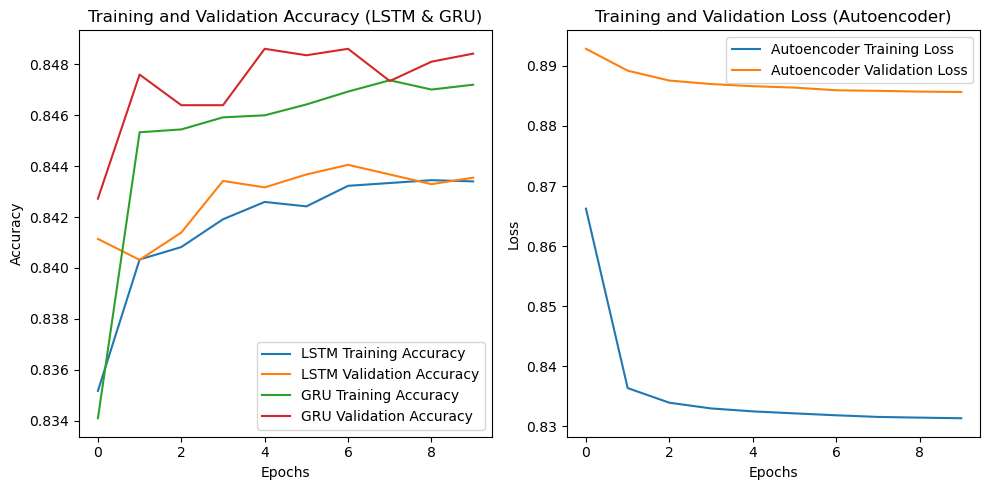

In [17]:

# Plot training history
plt.figure(figsize=(10, 5))

# Plot LSTM and GRU training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.plot(gru_history.history['accuracy'], label='GRU Training Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='GRU Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (LSTM & GRU)')
plt.legend()

# Plot Autoencoder training and validation loss
plt.subplot(1, 2, 2)
plt.plot(autoencoder_history.history['loss'], label='Autoencoder Training Loss')
plt.plot(autoencoder_history.history['val_loss'], label='Autoencoder Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Autoencoder)')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Input, RepeatVector, TimeDistributed
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Function to create LSTM model
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, input_shape=input_shape, return_sequences=True),
        Dropout(0.2),
        LSTM(32),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    return model

# Function to create GRU model
def create_gru_model(input_shape):
    model = Sequential([
        GRU(64, input_shape=input_shape, return_sequences=True),
        Dropout(0.2),
        GRU(32),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    return model

# Function to create Autoencoder model
def create_autoencoder_model(input_shape):
    model = Sequential([
        Input(input_shape),
        Dense(32, activation='relu'),
        Dense(input_shape[0], activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Split the data into training and validation sets
X_train, X_val, Y_train, Y_val = train_test_split(X_R2L, Y_R2L, test_size=0.2, random_state=42)

# Reshape input data for LSTM and GRU models
X_train_lstm = np.expand_dims(X_train, axis=1)  # Reshape for LSTM (add axis for time steps)
X_val_lstm = np.expand_dims(X_val, axis=1)  # Reshape for LSTM (add axis for time steps)

X_train_gru = np.expand_dims(X_train, axis=1)  # Reshape for GRU (add axis for time steps)
X_val_gru = np.expand_dims(X_val, axis=1)   # Reshape for GRU (add axis for time steps)

# Create and train LSTM model
lstm_model = create_lstm_model(X_train_lstm.shape[1:])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_history = lstm_model.fit(X_train_lstm, Y_train, epochs=10, validation_data=(X_val_lstm, Y_val))

# Create and train GRU model
gru_model = create_gru_model(X_train_gru.shape[1:])
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gru_history = gru_model.fit(X_train_gru, Y_train, epochs=10, validation_data=(X_val_gru, Y_val))

# Create and train Autoencoder model
autoencoder_model = create_autoencoder_model(X_train.shape[1:])
autoencoder_history = autoencoder_model.fit(X_train, X_train, epochs=10, validation_data=(X_val, X_val))

# Save models
lstm_model.save('r2l_lstm_model.h5')
gru_model.save('r2l_gru_model.h5')
autoencoder_model.save('r2l_autoencoder_model.h5')


Epoch 1/10
1709/1709 [==============================] - 25s 10ms/step - loss: -0.2063 - accuracy: 0.9719 - val_loss: -0.5034 - val_accuracy: 0.9769
Epoch 2/10
1709/1709 [==============================] - 14s 8ms/step - loss: -0.7083 - accuracy: 0.9784 - val_loss: -0.9284 - val_accuracy: 0.9781
Epoch 3/10
1709/1709 [==============================] - 14s 8ms/step - loss: -1.1380 - accuracy: 0.9792 - val_loss: -1.3879 - val_accuracy: 0.9792
Epoch 4/10
1709/1709 [==============================] - 14s 8ms/step - loss: -1.6351 - accuracy: 0.9791 - val_loss: -1.8219 - val_accuracy: 0.9802
Epoch 5/10
1709/1709 [==============================] - 14s 8ms/step - loss: -2.0875 - accuracy: 0.9791 - val_loss: -2.3088 - val_accuracy: 0.9798
Epoch 6/10
1709/1709 [==============================] - 14s 8ms/step - loss: -2.5623 - accuracy: 0.9791 - val_loss: -2.7363 - val_accuracy: 0.9789
Epoch 7/10
1709/1709 [==============================] - 14s 8ms/step - loss: -3.0360 - accuracy: 0.9794 - val_loss: -

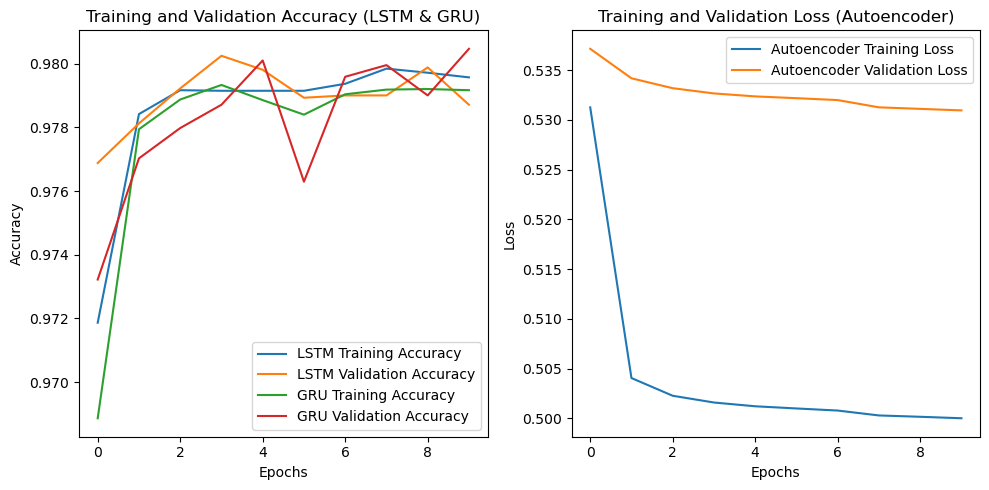

In [19]:
# Plot training history
plt.figure(figsize=(10, 5))

# Plot LSTM and GRU training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.plot(gru_history.history['accuracy'], label='GRU Training Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='GRU Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (LSTM & GRU)')
plt.legend()

# Plot Autoencoder training and validation loss
plt.subplot(1, 2, 2)
plt.plot(autoencoder_history.history['loss'], label='Autoencoder Training Loss')
plt.plot(autoencoder_history.history['val_loss'], label='Autoencoder Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Autoencoder)')
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Input, RepeatVector, TimeDistributed
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Function to create LSTM model
def create_lstm_model(input_shape):
    model = Sequential([
        LSTM(64, input_shape=input_shape, return_sequences=True),
        Dropout(0.2),
        LSTM(32),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    return model

# Function to create GRU model
def create_gru_model(input_shape):
    model = Sequential([
        GRU(64, input_shape=input_shape, return_sequences=True),
        Dropout(0.2),
        GRU(32),
        Dropout(0.2),
        Dense(1, activation='sigmoid')
    ])
    return model

# Function to create Autoencoder model
def create_autoencoder_model(input_shape):
    model = Sequential([
        Input(input_shape),
        Dense(32, activation='relu'),
        Dense(input_shape[0], activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Train/test split
X_train, X_val, Y_train, Y_val = train_test_split(X_U2R, Y_U2R, test_size=0.2, random_state=42)

# Reshape input data for LSTM and GRU models
X_train_lstm = np.expand_dims(X_train, axis=1)  # Reshape for LSTM (add axis for time steps)
X_val_lstm = np.expand_dims(X_val, axis=1)  # Reshape for LSTM (add axis for time steps)

X_train_gru = np.expand_dims(X_train, axis=1)  # Reshape for GRU (add axis for time steps)
X_val_gru = np.expand_dims(X_val, axis=1)  # Reshape for GRU (add axis for time steps)

# Create and train LSTM model
lstm_model = create_lstm_model(X_train_lstm.shape[1:])
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_history = lstm_model.fit(X_train_lstm, Y_train, epochs=10, validation_data=(X_val_lstm, Y_val))

# Create and train GRU model
gru_model = create_gru_model(X_train_gru.shape[1:])
gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gru_history = gru_model.fit(X_train_gru, Y_train, epochs=10, validation_data=(X_val_gru, Y_val))

# Create and train Autoencoder model
autoencoder_model = create_autoencoder_model(X_train.shape[1:])
autoencoder_history = autoencoder_model.fit(X_train, X_train, epochs=10, validation_data=(X_val, X_val))

# Save models
lstm_model.save('u2r_lstm_model.h5')
gru_model.save('u2r_gru_model.h5')
autoencoder_model.save('u2r_autoencoder_model.h5')


Epoch 1/10
1685/1685 [==============================] - 25s 10ms/step - loss: 0.0325 - accuracy: 0.9959 - val_loss: 0.0035 - val_accuracy: 0.9990
Epoch 2/10
1685/1685 [==============================] - 14s 8ms/step - loss: -0.0022 - accuracy: 0.9987 - val_loss: -0.0061 - val_accuracy: 0.9990
Epoch 3/10
1685/1685 [==============================] - 14s 8ms/step - loss: -0.0102 - accuracy: 0.9987 - val_loss: -0.0120 - val_accuracy: 0.9989
Epoch 4/10
1685/1685 [==============================] - 14s 8ms/step - loss: -0.0203 - accuracy: 0.9989 - val_loss: -0.0187 - val_accuracy: 0.9988
Epoch 5/10
1685/1685 [==============================] - 14s 8ms/step - loss: -0.0273 - accuracy: 0.9988 - val_loss: -0.0182 - val_accuracy: 0.9990
Epoch 6/10
1685/1685 [==============================] - 15s 9ms/step - loss: -0.0339 - accuracy: 0.9989 - val_loss: -0.0199 - val_accuracy: 0.9990
Epoch 7/10
1685/1685 [==============================] - 14s 8ms/step - loss: -0.0450 - accuracy: 0.9989 - val_loss: -0.

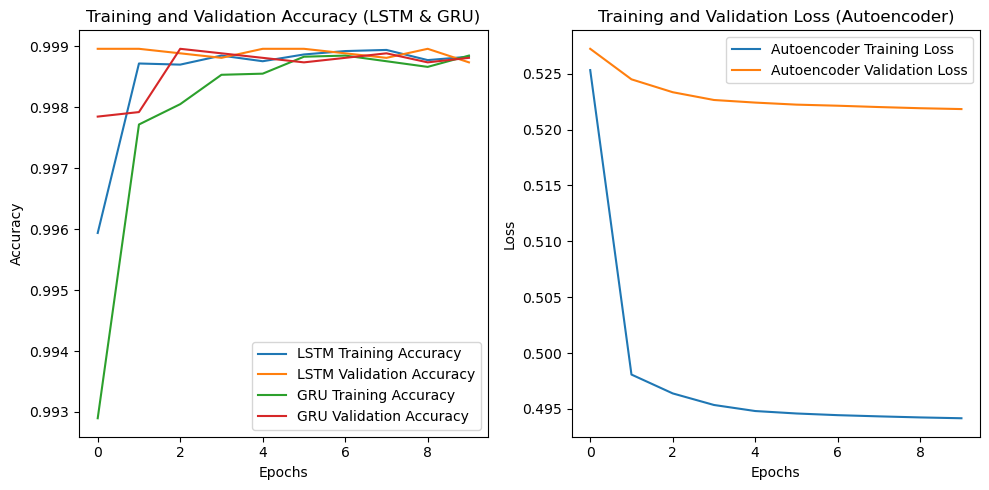

In [22]:
# Plot training history
plt.figure(figsize=(10, 5))

# Plot LSTM and GRU training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(lstm_history.history['accuracy'], label='LSTM Training Accuracy')
plt.plot(lstm_history.history['val_accuracy'], label='LSTM Validation Accuracy')
plt.plot(gru_history.history['accuracy'], label='GRU Training Accuracy')
plt.plot(gru_history.history['val_accuracy'], label='GRU Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy (LSTM & GRU)')
plt.legend()

# Plot Autoencoder training and validation loss
plt.subplot(1, 2, 2)
plt.plot(autoencoder_history.history['loss'], label='Autoencoder Training Loss')
plt.plot(autoencoder_history.history['val_loss'], label='Autoencoder Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss (Autoencoder)')
plt.legend()

plt.tight_layout()
plt.show()

In [25]:
from tensorflow.keras.models import load_model

# Load the saved models
dos_lstm_model = load_model('lstm_model.h5')
dos_gru_model = load_model('gru_model.h5')
dos_autoencoder_model = load_model('autoencoder_model.h5')

# Generate model summaries
print("DoS LSTM Model Summary:")
print(dos_lstm_model.summary())
print("\nDoS GRU Model Summary:")
print(dos_gru_model.summary())
print("\nDoS Autoencoder Model Summary:")
print(dos_autoencoder_model.summary())


DoS LSTM Model Summary:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             47872     
                                                                 
 dropout (Dropout)           (None, 1, 64)             0         
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 60321 (235.63 KB)
Trainable params: 60321 (235.63 KB)
Non-trainable params: 0 (0.00 Byte)
____________________________________________________________

In [26]:
probe_lstm_model = load_model('probe_lstm_model.h5')
probe_gru_model = load_model('probe_gru_model.h5')
probe_autoencoder_model = load_model('probe_autoencoder_model.h5')

print("\nProbe LSTM Model Summary:")
print(probe_lstm_model.summary())
print("\nProbe GRU Model Summary:")
print(probe_gru_model.summary())
print("\nProbe Autoencoder Model Summary:")
print(probe_autoencoder_model.summary())



Probe LSTM Model Summary:
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 64)             47872     
                                                                 
 dropout_4 (Dropout)         (None, 1, 64)             0         
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_5 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 60321 (235.63 KB)
Trainable params: 60321 (235.63 KB)
Non-trainable params: 0 (0.00 Byte)
_______________________________________________________

In [27]:
r2l_lstm_model = load_model('r2l_lstm_model.h5')
r2l_gru_model = load_model('r2l_gru_model.h5')
r2l_autoencoder_model = load_model('r2l_autoencoder_model.h5')

print("\nR2L LSTM Model Summary:")
print(r2l_lstm_model.summary())
print("\nR2L GRU Model Summary:")
print(r2l_gru_model.summary())
print("\nR2L Autoencoder Model Summary:")
print(r2l_autoencoder_model.summary())



R2L LSTM Model Summary:
Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 1, 64)             47872     
                                                                 
 dropout_8 (Dropout)         (None, 1, 64)             0         
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_9 (Dropout)         (None, 32)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 60321 (235.63 KB)
Trainable params: 60321 (235.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________

In [28]:
u2r_lstm_model = load_model('u2r_lstm_model.h5')
u2r_gru_model = load_model('u2r_gru_model.h5')
u2r_autoencoder_model = load_model('u2r_autoencoder_model.h5')

print("\nU2R LSTM Model Summary:")
print(u2r_lstm_model.summary())
print("\nU2R GRU Model Summary:")
print(u2r_gru_model.summary())
print("\nU2R Autoencoder Model Summary:")
print(u2r_autoencoder_model.summary())



U2R LSTM Model Summary:
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 1, 64)             47872     
                                                                 
 dropout_12 (Dropout)        (None, 1, 64)             0         
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_13 (Dropout)        (None, 32)                0         
                                                                 
 dense_12 (Dense)            (None, 1)                 33        
                                                                 
Total params: 60321 (235.63 KB)
Trainable params: 60321 (235.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________

In [30]:
import pandas as pd

# Define the model names and their corresponding accuracy scores
model_names = ['DoS LSTM', 'DoS GRU', 'DoS Autoencoder', 'Probe LSTM', 'Probe GRU', 'Probe Autoencoder', 
               'R2L LSTM', 'R2L GRU', 'R2L Autoencoder', 'U2R LSTM', 'U2R GRU', 'U2R Autoencoder']
accuracy_scores = [dos_lstm_accuracy, dos_gru_accuracy, dos_autoencoder_accuracy, probe_lstm_accuracy, probe_gru_accuracy, probe_autoencoder_accuracy, 
                   r2l_lstm_accuracy, r2l_gru_accuracy, r2l_autoencoder_accuracy, u2r_lstm_accuracy, u2r_gru_accuracy, u2r_autoencoder_accuracy]

# Reshape data for DataFrame
data = {'Model': model_names, 'Accuracy': accuracy_scores}
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


NameError: name 'dos_lstm_accuracy' is not defined